In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from google.colab import drive
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hypertension_data.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(26083, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,26083.0,55.661389,15.189768,11.0,44.0,56.0,67.0,98.0
sex,26058.0,0.500000,0.500010,0.0,0.0,0.5,1.0,1.0
cp,26083.0,0.958594,1.023931,0.0,0.0,1.0,2.0,3.0
trestbps,26083.0,131.592992,17.588809,94.0,120.0,130.0,140.0,200.0
chol,26083.0,246.246061,51.643522,126.0,211.0,240.0,275.0,564.0
fbs,26083.0,0.149753,0.356836,0.0,0.0,0.0,0.0,1.0
restecg,26083.0,0.526512,0.525641,0.0,0.0,1.0,1.0,2.0
thalach,26083.0,149.655024,22.858109,71.0,133.0,153.0,166.0,202.0
exang,26083.0,0.326573,0.468969,0.0,0.0,0.0,1.0,1.0
oldpeak,26083.0,1.039512,1.165138,0.0,0.0,0.8,1.6,6.2


In [ ]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26079,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26080,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26081,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()/len(df)*100

,0
age,0.000000
sex,0.095848
cp,0.000000
trestbps,0.000000
chol,0.000000
fbs,0.000000
restecg,0.000000
thalach,0.000000
exang,0.000000
oldpeak,0.000000


In [ ]:
df=df.dropna()
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()


0

In [ ]:
missing_values = df.isnull()
missing_count = missing_values.sum()
missing_count


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.dtypes

age         float64
sex         float64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
for col in df.columns:
  print(col,': ',df[col].unique())

age :  [57. 64. 52. 56. 66. 51. 42. 38. 72. 47. 55. 63. 41. 81. 70. 62. 75. 69.
 39. 50. 59. 49. 34. 46. 40. 33. 67. 54. 60. 61. 45. 68. 58. 43. 65. 74.
 53. 76. 48. 44. 87. 71. 78. 77. 82. 73. 32. 29. 36. 83. 27. 84. 35. 31.
 86. 79. 80. 37. 22. 30. 28. 88. 85. 26. 25. 21. 23. 24. 19. 17. 12. 20.
 18. 16. 15. 11. 13. 14. 91. 97. 92. 93. 94. 96. 89. 90. 98. 95.]
sex :  [1. 0.]
cp :  [3 2 1 0]
trestbps :  [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol :  [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 30

In [ ]:
categorical_columns=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
len(categorical_columns)

9

In [ ]:
continuous_columns=[]
for col in df.columns:
  if col not in categorical_columns:
    continuous_columns.append(col)
continuous_columns

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

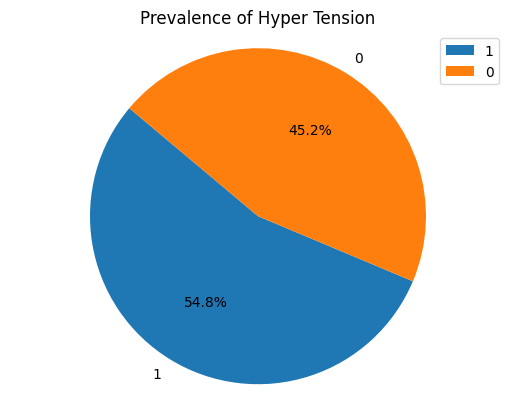

In [ ]:
HyperTension = df['target'].value_counts()
labels = HyperTension.index
sizes = HyperTension.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Prevalence of Hyper Tension')
plt.legend(labels, loc="upper right")
plt.show()


In [ ]:
cont_df=df[continuous_columns]

In [ ]:
cont_df.head()

,age,trestbps,chol,thalach,oldpeak
0,57.0,145,233,150,2.3
1,64.0,130,250,187,3.5
2,52.0,130,204,172,1.4
3,56.0,120,236,178,0.8
4,66.0,120,354,163,0.6


In [ ]:
corr_matrix=cont_df.corr()
corr_matrix

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.021836,0.018001,-0.050435,0.008104
trestbps,0.021836,1.000000,0.133460,-0.050889,0.203892
chol,0.018001,0.133460,1.000000,-0.007400,0.047298
thalach,-0.050435,-0.050889,-0.007400,1.000000,-0.344758
oldpeak,0.008104,0.203892,0.047298,-0.344758,1.000000


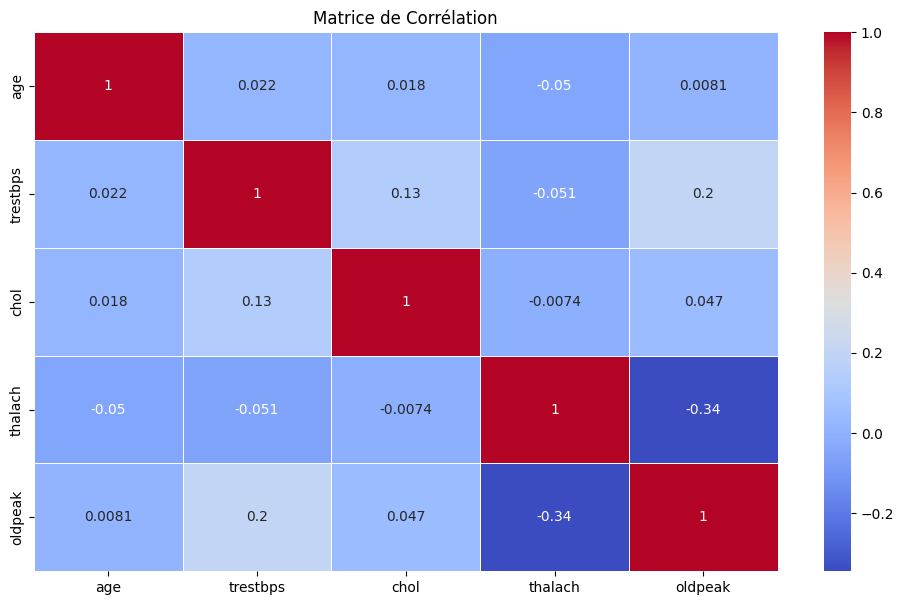

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

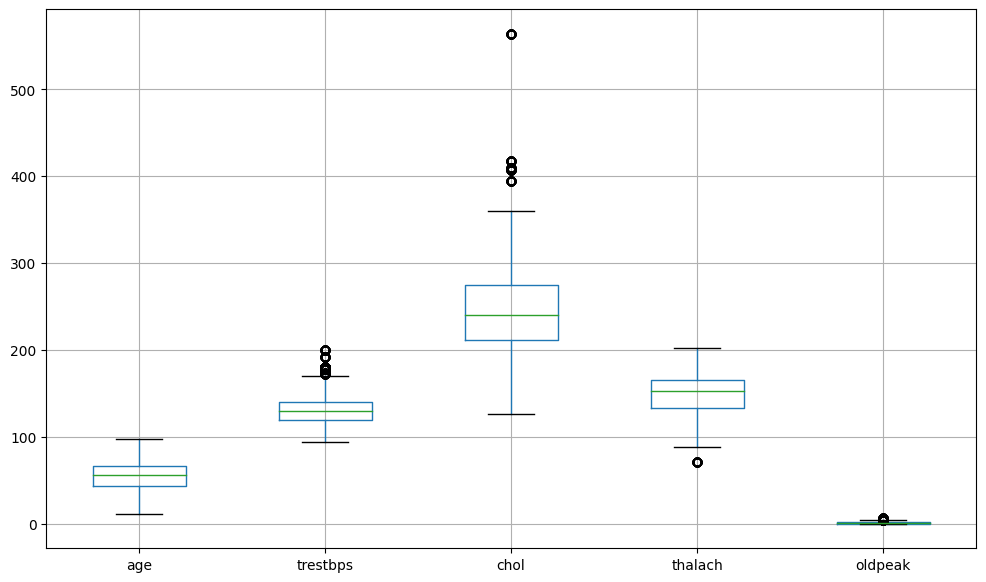

In [ ]:
plt.figure(figsize=(12, 7))
cont_df.boxplot()
plt.show()

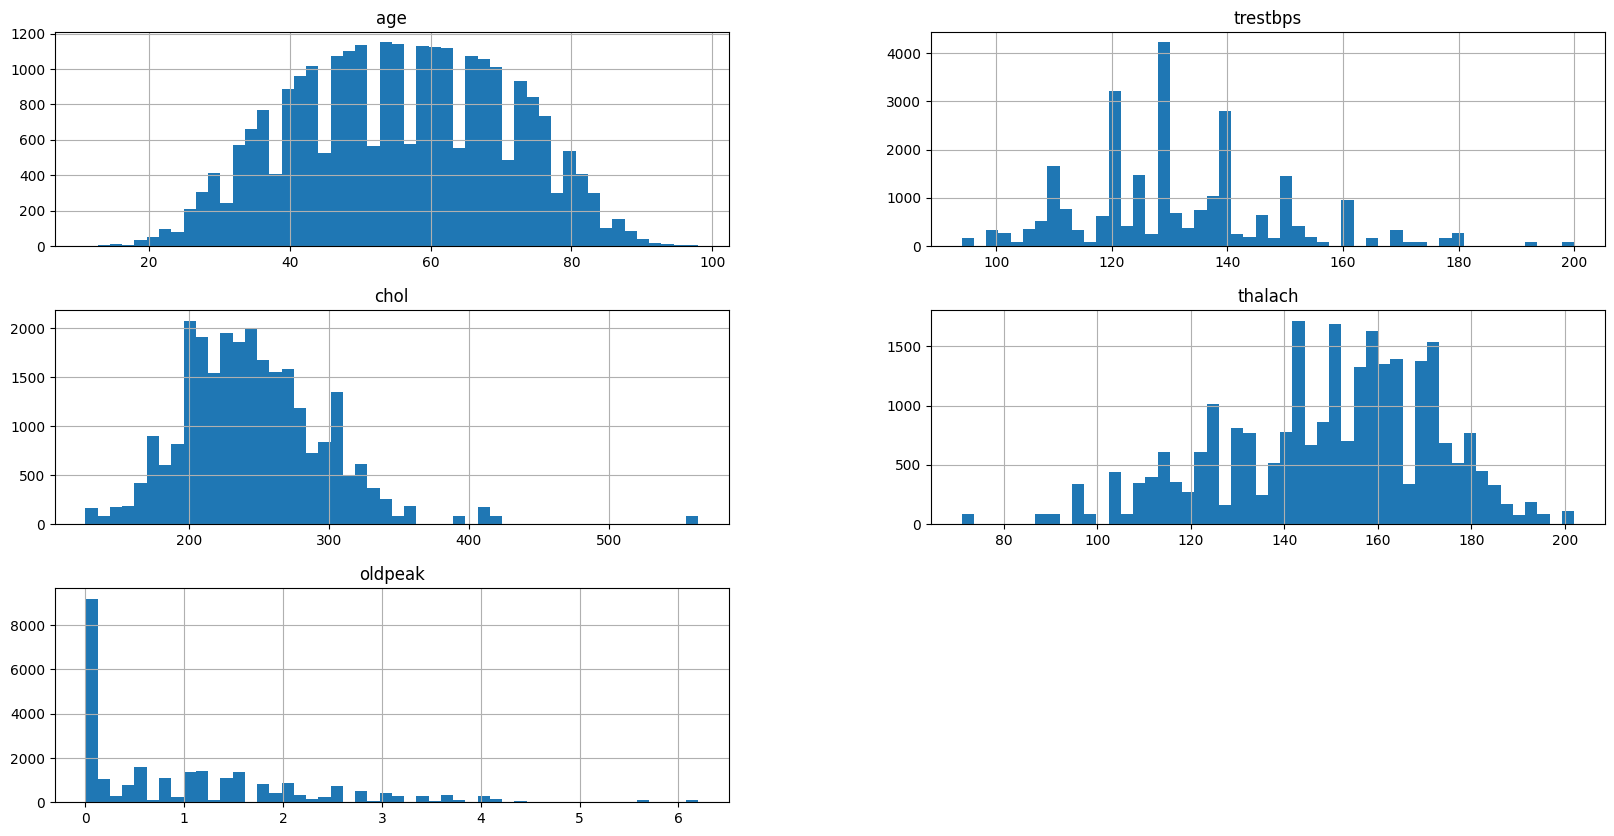

In [ ]:
cont_df.hist(bins=50,figsize=(20,10))
plt.show()

<Axes: title={'center': 'Correlation with HeartDisease'}>

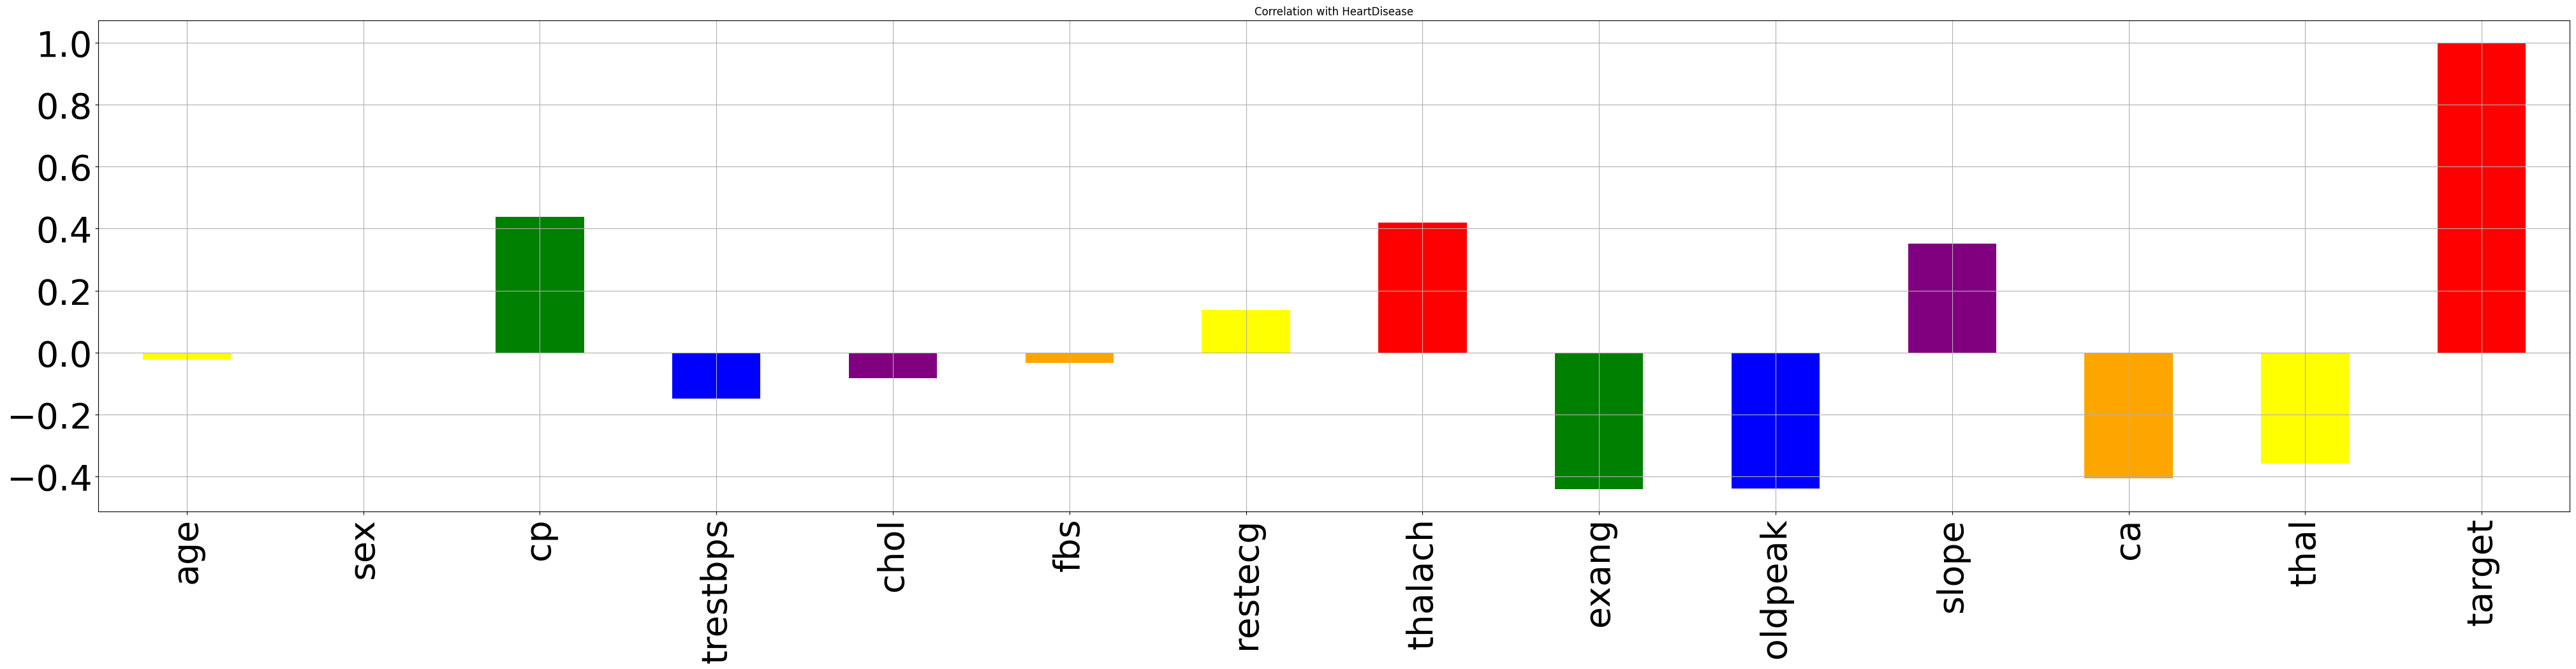

In [ ]:
from seaborn._core.properties import FontSize

c=['yellow','red','green','blue','purple','orange']
df.corrwith(df['target']).plot.bar(figsize=(50,10),title='Correlation with HeartDisease',fontsize=40,rot=90,grid=True,color=c)

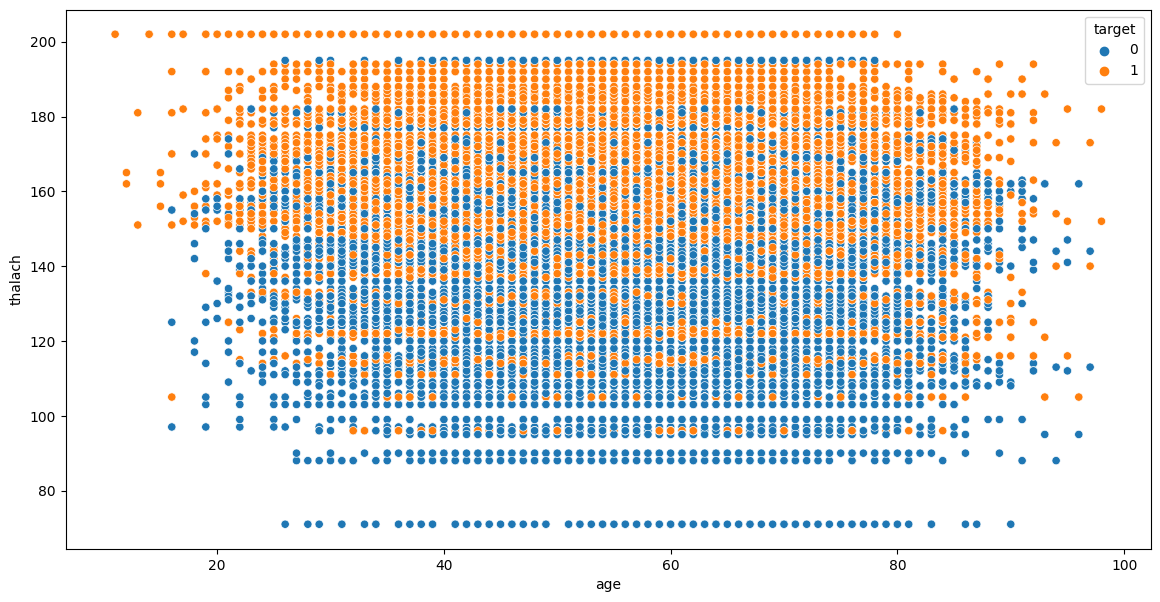

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=df,x='age',y='thalach',hue='target')
plt.show()

In [ ]:
cat_df= pd.DataFrame()
cat_df['sex']=df['sex'].replace({0:'Female',1:'Male'})
cat_df['cp']=df['cp'].replace({ 0:'asymptomatic' ,1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain'})
cat_df['target']=df['target'].replace({0:'Undiagnosed',1:'Diagnosed'})
cat_df['fbs']=df['fbs'].replace({0:'<=120mg/dl',1:'>120mg/dl'})
cat_df['slope']=df['slope'].replace({0: 'upsloping', 1: 'flat' ,2:'downsloping'})
cat_df['exang']=df['exang'].replace({0:'NO',1:'Yes'})
cat_df['restecg']=df['restecg'].replace({0: 'normal', 1: 'ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)', 2:'probable or definite left ventricular hypertrophy by Estes criteria'})
cat_df['ca']=df['ca']
cat_df['thal']=df['thal']

In [ ]:
cat_df.head()

,sex,cp,target,fbs,slope,exang,restecg,ca,thal
0,Male,non-anginal pain,Diagnosed,>120mg/dl,upsloping,NO,normal,0,1
1,Female,atypical angina,Diagnosed,<=120mg/dl,upsloping,NO,ST-T wave abnormality (T wave inversions and/o...,0,2
2,Male,typical angina,Diagnosed,<=120mg/dl,downsloping,NO,normal,0,2
3,Female,typical angina,Diagnosed,<=120mg/dl,downsloping,NO,ST-T wave abnormality (T wave inversions and/o...,0,2
4,Female,asymptomatic,Diagnosed,<=120mg/dl,downsloping,Yes,ST-T wave abnormality (T wave inversions and/o...,0,2


<Axes: >

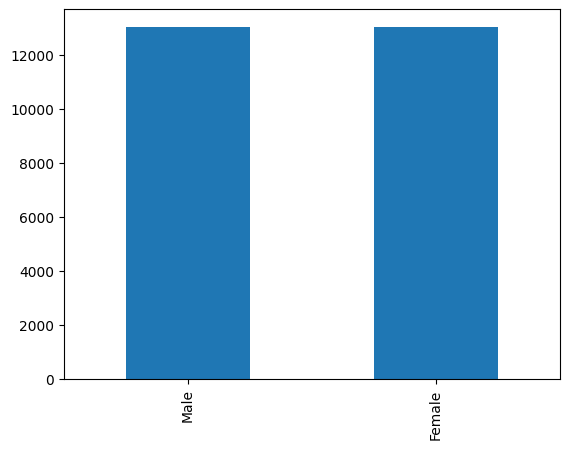

In [ ]:
cat_df['sex'].value_counts().plot(kind='bar')

<Axes: >

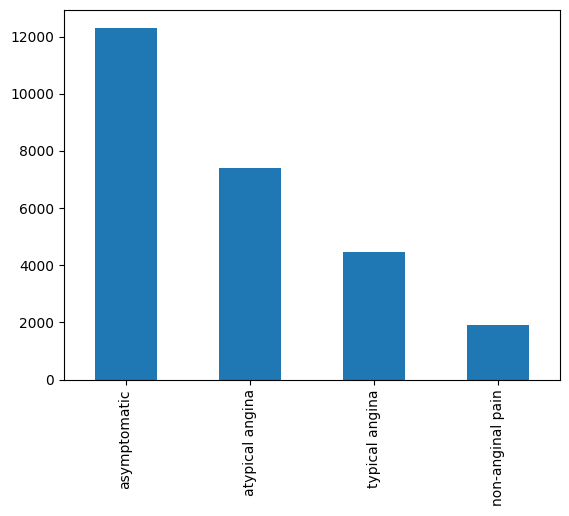

In [ ]:
cat_df['cp'].value_counts().plot(kind='bar')

<Axes: >

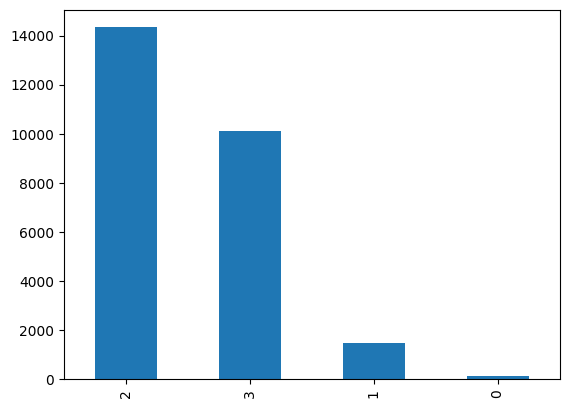

In [ ]:
cat_df['thal'].value_counts().plot(kind='bar')

<Axes: >

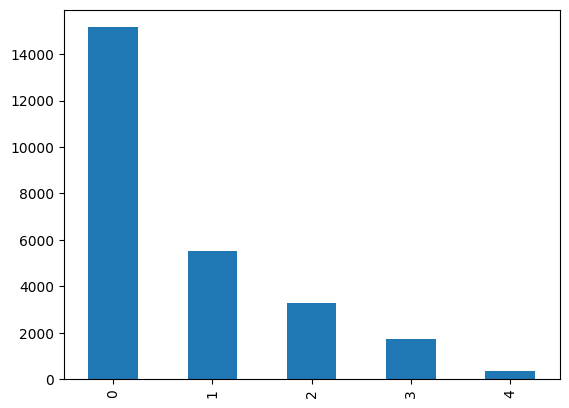

In [ ]:
cat_df['ca'].value_counts().plot(kind='bar')

<Axes: >

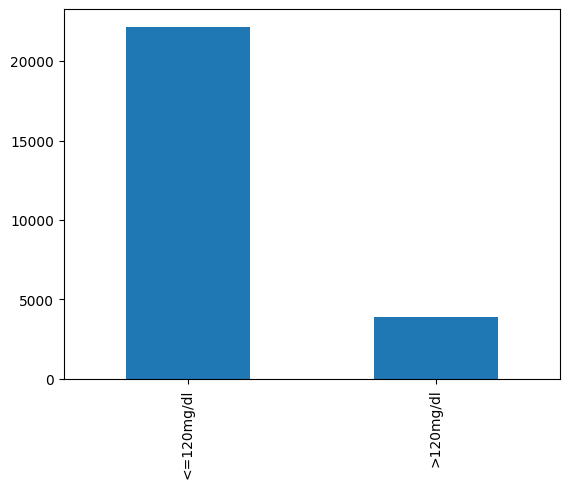

In [ ]:
cat_df['fbs'].value_counts().plot(kind='bar')

<Axes: >

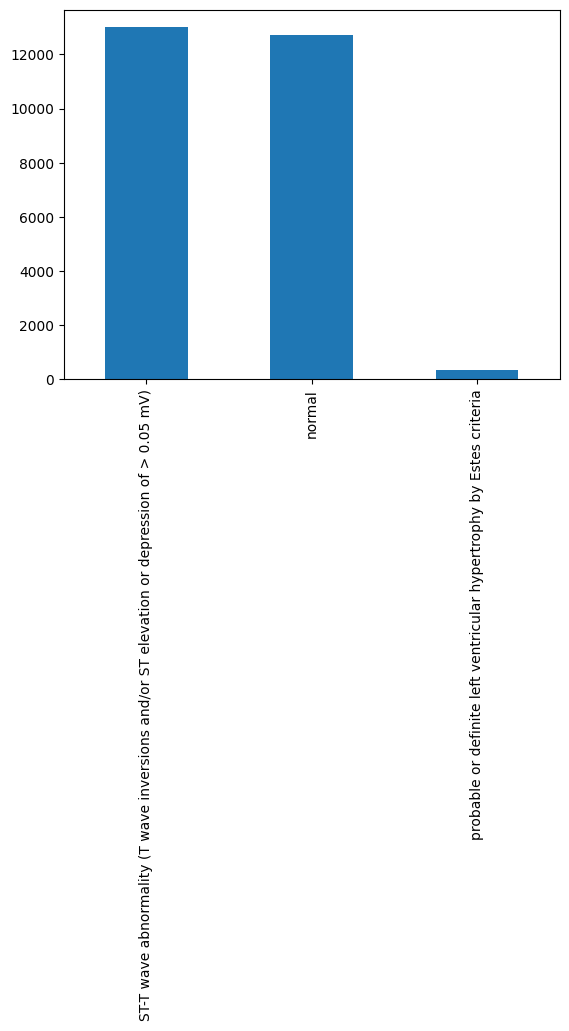

In [ ]:
cat_df['restecg'].value_counts().plot(kind='bar')

<Axes: >

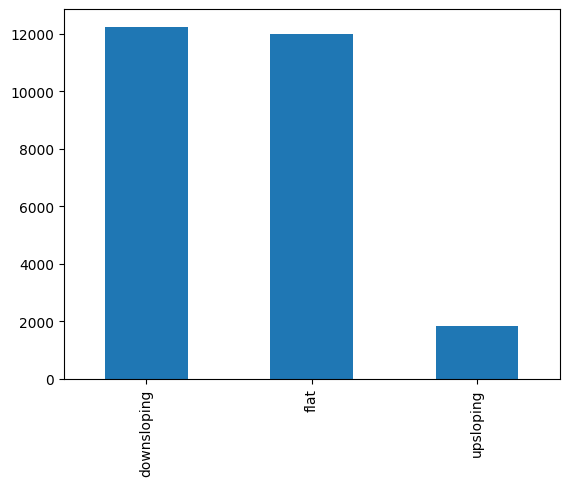

In [ ]:
cat_df['slope'].value_counts().plot(kind='bar')

<Axes: >

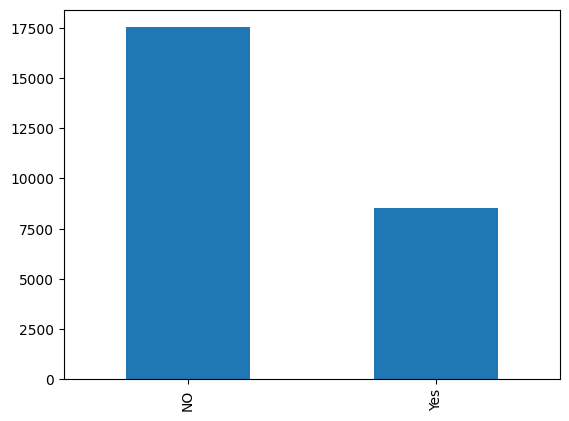

In [ ]:
cat_df['exang'].value_counts().plot(kind='bar')

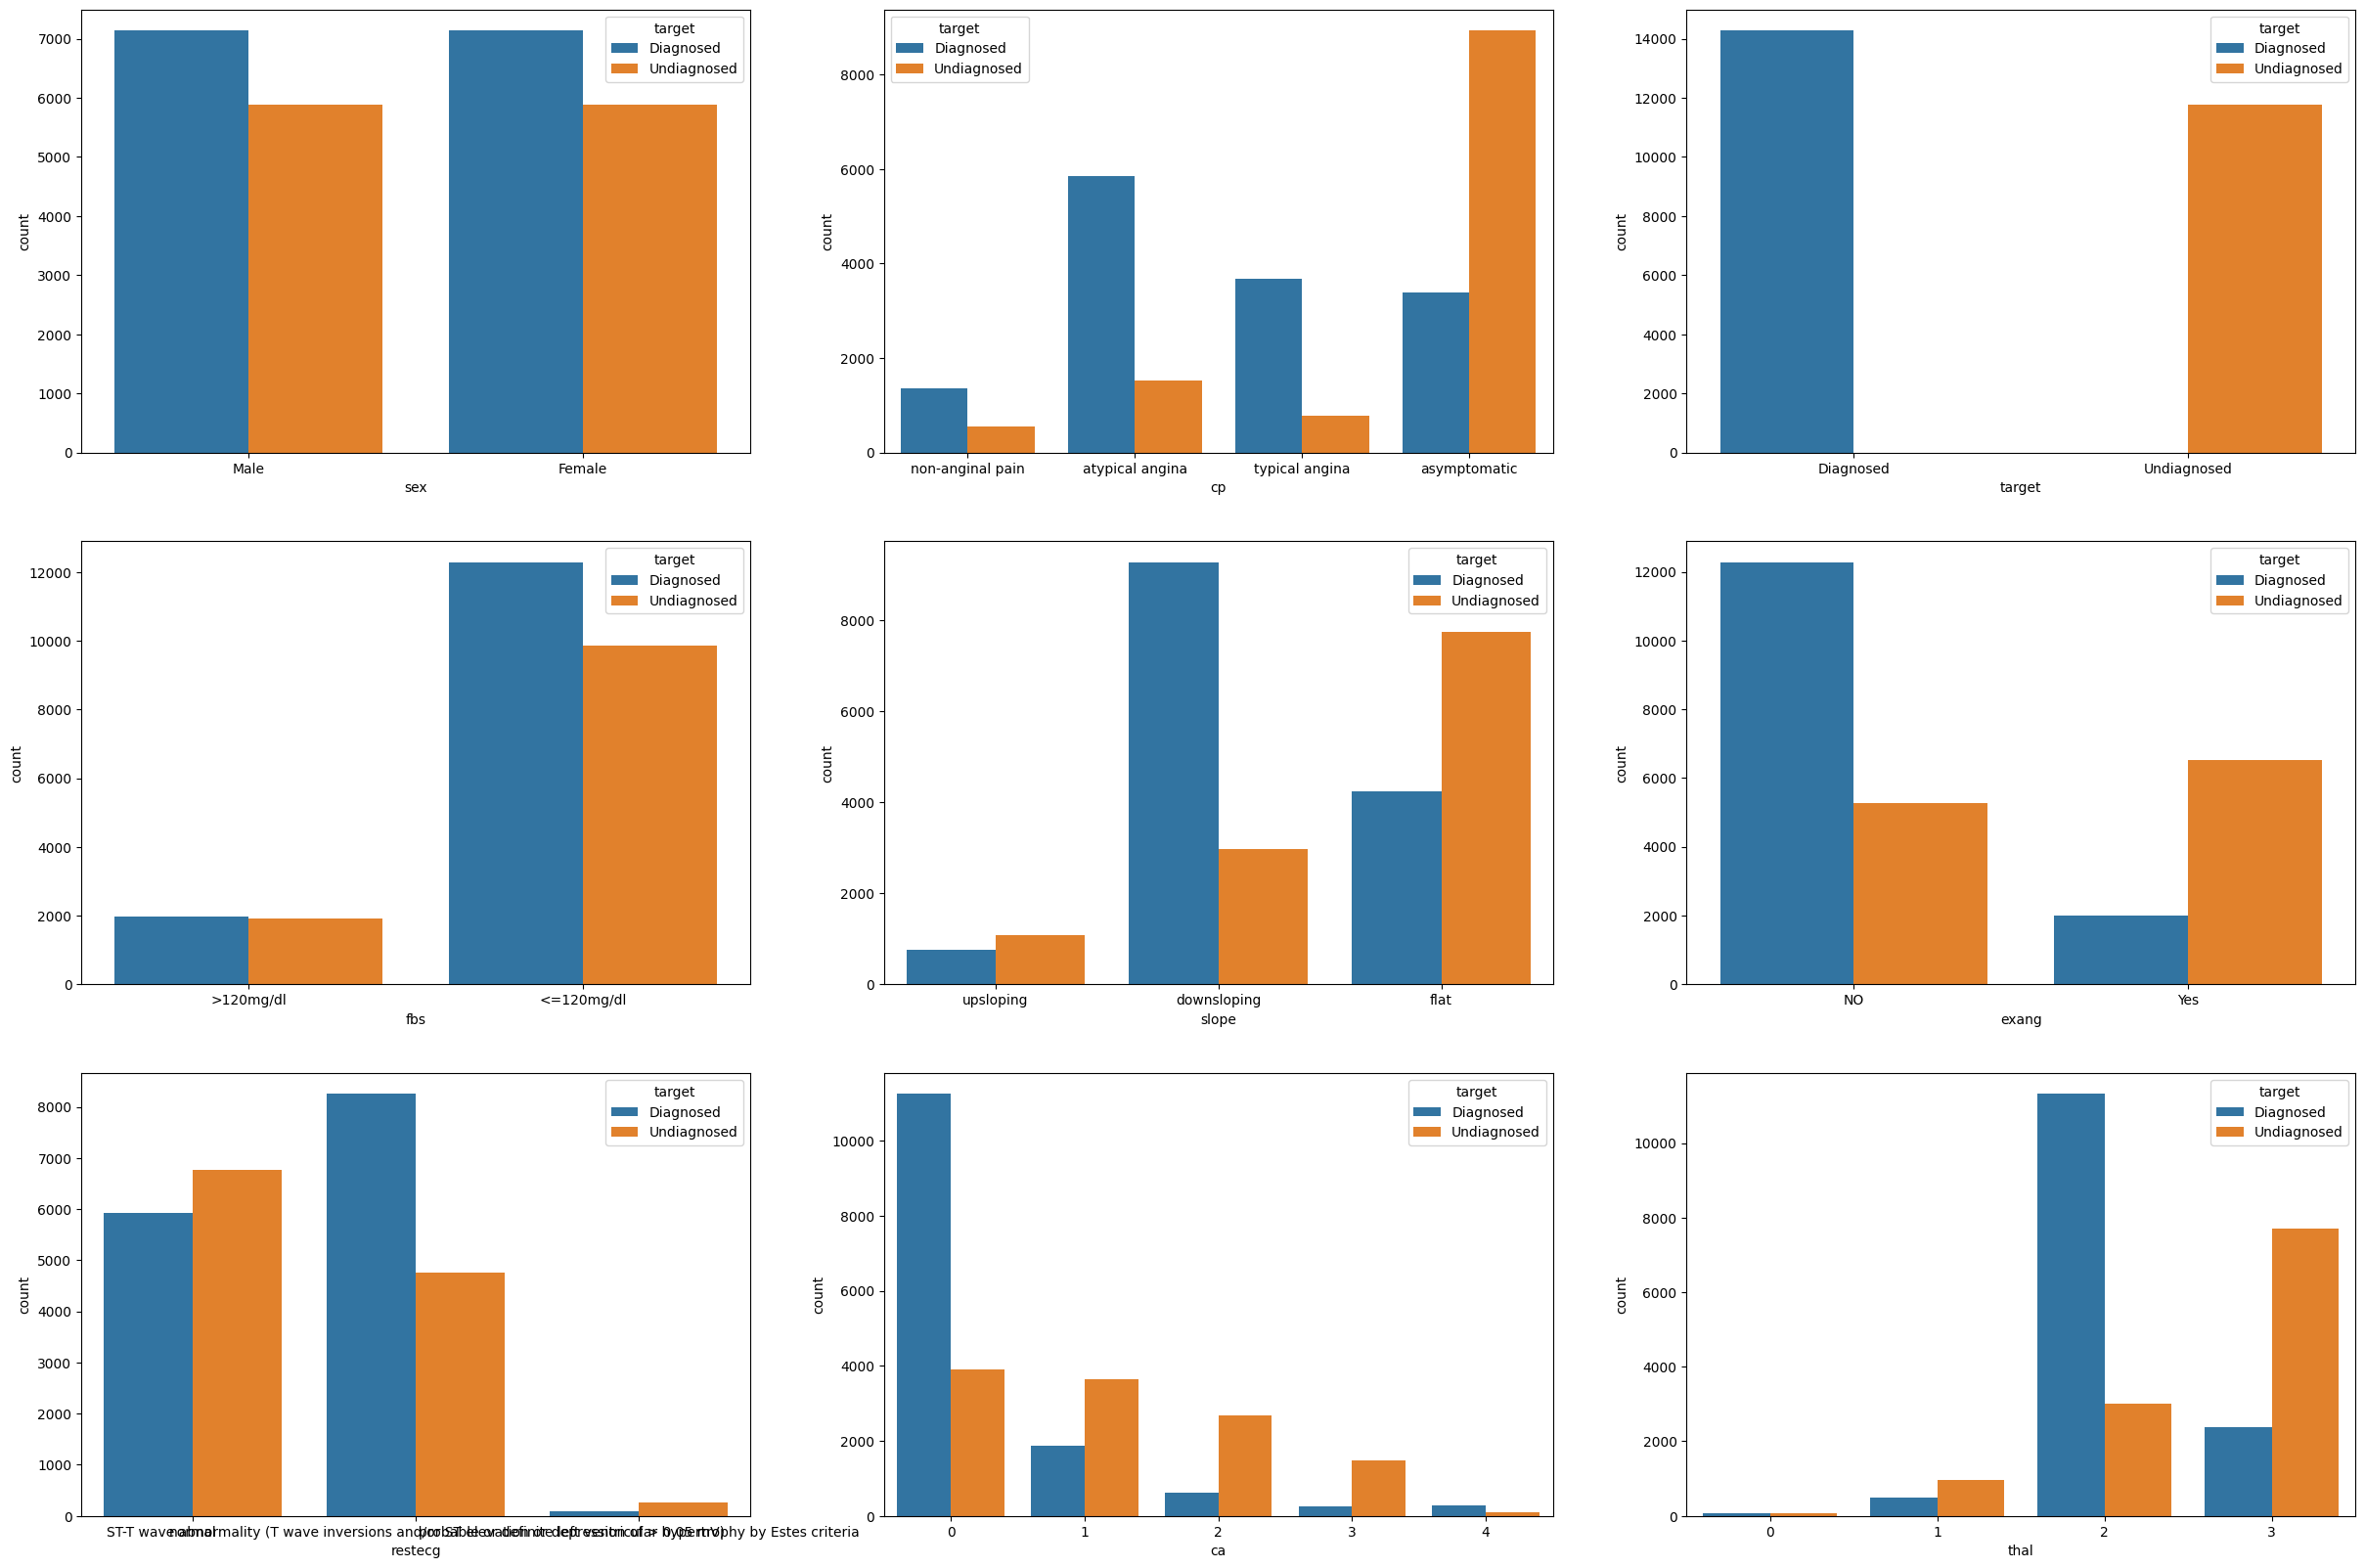

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(cat_df.columns):
  if (i != 'target'):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(x=i[1],hue='target',data=cat_df)

plt.show()

In [ ]:
X=df.drop('target',axis=1)

In [ ]:
y=df['target']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0);

In [ ]:
logistic_model= LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid,cv=5)
grid_search.fit(X_train,y_train)
best_params_logistic= grid_search.best_params_
best_estimator_logistic = grid_search.best_estimator_
y_pred_logistic = best_estimator_logistic.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Best Parameters:", best_params_logistic)
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)
print('confusion matrix:',confusion_logistic)

Best Parameters: {'C': 10}
Accuracy: 0.8447812739831159
Precision: 0.8224476854787571
Recall: 0.9124164614843475
F1 Score: 0.865099216274804
confusion matrix: [[1809  560]
 [ 249 2594]]


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid_knn = {
    'n_neighbors': [1,2,3,4, 5,6, 7,8, 9],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
best_params_knn = grid_search_knn.best_params_
best_estimator_knn = grid_search_knn.best_estimator_
y_pred_knn = best_estimator_knn.predict(X_test)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)


TypeError: ignored

In [ ]:
print("Best Parameters:", best_params_knn)
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print('confusion matrix:',confusion_knn)

#SVM


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge']
}
svm = LinearSVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_
best_estimator_svm = grid_search_svm.best_estimator_
y_pred_svm = best_estimator_svm.predict(X_test)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [ ]:
print("Meilleurs paramètres SVM :", best_params_svm)
print("Exactitude SVM :", accuracy_svm)
print("Précision SVM :", precision_svm)
print("Rappel SVM :", recall_svm)
print("Score F1 SVM :", f1_svm)
print('confusion matrix:',confusion_svm)

Meilleurs paramètres SVM : {'C': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
Exactitude SVM : 0.8484267075978511
Précision SVM : 0.8122908427137208
Rappel SVM : 0.939148786493141
Score F1 SVM : 0.871125611745514
confusion matrix: [[1752  617]
 [ 173 2670]]


#Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
import graphviz
from sklearn import tree

In [ ]:
model_decision= DecisionTreeClassifier()
param_grid_decision={
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,6,7,8]}
grid_search_decision = GridSearchCV(model_decision, param_grid_decision, cv=5)
grid_search_decision.fit(X_train, y_train)
best_params_decision = grid_search_decision.best_params_
best_estimator_decision = grid_search_decision.best_estimator_
y_pred_decision = best_estimator_decision.predict(X_test)
confusion_decision = confusion_matrix(y_test, y_pred_decision)
accuracy_decision = accuracy_score(y_test, y_pred_decision)
precision_decision = precision_score(y_test, y_pred_decision)
recall_decision = recall_score(y_test, y_pred_decision)
f1_decision = f1_score(y_test, y_pred_decision)

In [ ]:
print("Best Parameters:", best_params_decision)
print("Accuracy:", accuracy_decision)
print("Precision:", precision_decision)
print("Recall:", recall_decision)
print("F1 Score:", f1_decision)
print('confusion matrix:',confusion_decision)

Best Parameters: {'criterion': 'gini', 'max_depth': 8}
Accuracy: 0.9800460475825019
Precision: 0.9800210304942166
Recall: 0.9834681674287724
F1 Score: 0.9817415730337078
confusion matrix: [[2312   57]
 [  47 2796]]


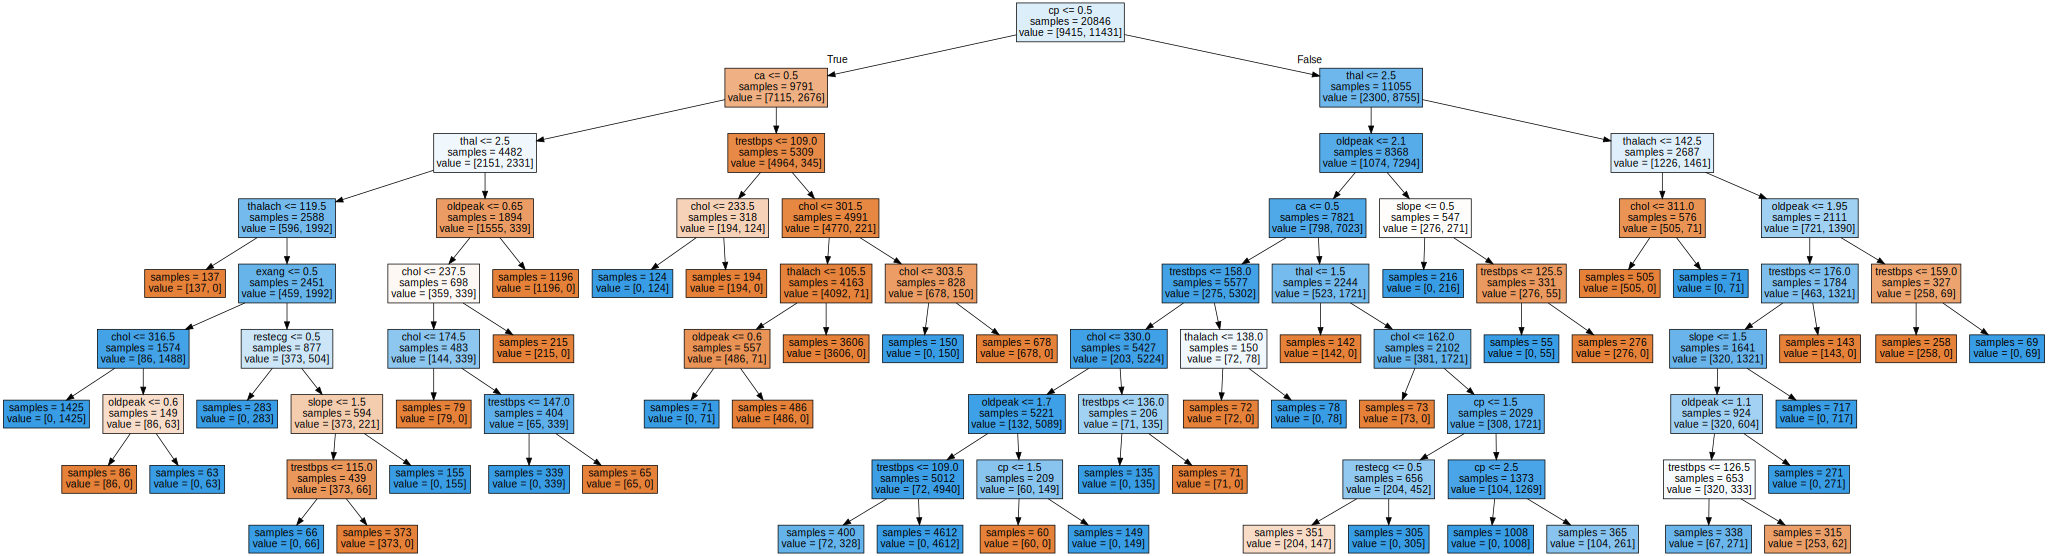

In [ ]:
import graphviz
from IPython.display import display
from sklearn.tree import export_graphviz

def draw_tree(tree_model, features, size=(8, 6), dpi=80):
    tree_data = export_graphviz(tree_model,
                                impurity=False,
                                feature_names=features,
                                filled=True,
                                out_file=None)
    graph = graphviz.Source(tree_data)
    graph.render("decision_tree")
    display(graph)
model_decision = DecisionTreeClassifier(**best_params_decision)
model_decision.fit(X_train, y_train)
y_pred=model_decision.predict(X_test)



draw_tree(model_decision, X_train.columns)


In [ ]:
print("Best Parameters:", best_params_decision)
print("Accuracy:", accuracy_decision)
print("Precision:", precision_decision)
print("Recall:", recall_decision)
print("F1 Score:", f1_decision)
print('confusion matrix:',confusion_decision)

Best Parameters: {'criterion': 'gini', 'max_depth': 8}
Accuracy: 0.9800460475825019
Precision: 0.9800210304942166
Recall: 0.9834681674287724
F1 Score: 0.9817415730337078
confusion matrix: [[2312   57]
 [  47 2796]]


In [ ]:
model_names = ['Logistic Regression', 'KNN', 'SVM','model_decision']
accuracy = [accuracy_logistic, accuracy_knn, accuracy_svm,accuracy_decision]
precision = [precision_logistic,precision_knn,precision_svm,precision_decision]
f1_score = [f1_logistic,f1_knn,f1_svm,f1_decision]
confusion_matrices =[confusion_logistic,confusion_knn,confusion_svm,confusion_decision]
data = {
    'Model': model_names,
    'Accuracy': accuracy,
    'Precision': precision,
    'F1 Score': f1_score,
    'Confusion Matrix': confusion_matrices
}
models_df = pd.DataFrame(data)
models_df

,Model,Accuracy,Precision,F1 Score,Confusion Matrix
0,Logistic Regression,0.844781,0.822448,0.865099,"[[1809, 560], [249, 2594]]"
1,KNN,1.000000,1.000000,1.000000,"[[2369, 0], [0, 2843]]"
2,SVM,0.848427,0.812291,0.871126,"[[1752, 617], [173, 2670]]"
3,model_decision,0.980046,0.980021,0.981742,"[[2312, 57], [47, 2796]]"


In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier (estimators = [('knn', knn) , ('svm', svm) , ('logistic_model',logistic_model) , ('TREE', model_decision )] , voting='hard')
voting_clf.fit(X_train , y_train)
for clf in (knn , svm ,logistic_model , model_decision  ) :
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    print(clf , accuracy_score(y_test , y_pred))
print('voting_clf' , accuracy_score(y_test , y_pred) )

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier() 0.9969301611665388


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC() 0.8476592478894858
LogisticRegression() 0.8451650038372985
DecisionTreeClassifier(max_depth=8) 0.9806216423637759
voting_clf 0.9806216423637759


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier()
svm = SVC(probability=True)
logistic_model = LogisticRegression()
model_decision = DecisionTreeClassifier()

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', svm),
    ('logistic_model', logistic_model),
    ('TREE', model_decision)
], voting='hard')


param_grid = {
    'voting': ['hard', 'soft'],  # You can tune the voting parameter
    'weights': [[1, 1, 1, 1], [2, 1, 1, 1], [1, 2, 1, 1], [1, 1, 2, 1], [1, 1, 1, 2]],  # You can tune the weights parameter
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=voting_clf, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model from the grid search
best_voting_clf = grid_search.best_estimator_

y_pred_best_voting = best_voting_clf.predict(X_test)
print('Best voting_clf', accuracy_score(y_test, y_pred_best_voting))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c